### Import Libraries and Data Set

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import warnings  #to suppress warning messages
warnings.filterwarnings('ignore')

df = pd.read_csv('C:\\Users\\Aditya agrawal\\Downloads\\Iris.csv')
df.drop(['Id'], axis = 1 , inplace = True)

df.head() #first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Generate Summary Statistics

In [72]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Check for Null values and Class Balance

In [117]:
df.info()
df.groupby('Species').size()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Inference -<br>
-Classes are perfectly balanced,a very rare case<br>
-No null values- preprocessing not required

### Exploratory Analysis on Variables

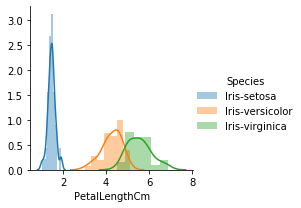

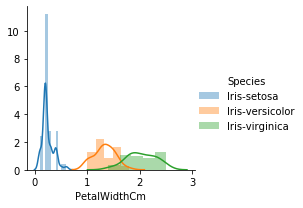

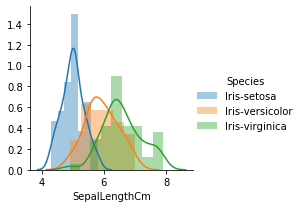

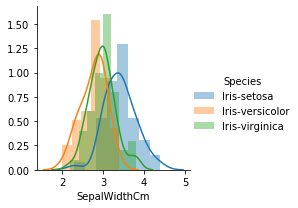

In [74]:
#distribution of data
sns.FacetGrid(df,hue="Species").map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species").map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(df,hue="Species").map(sns.distplot,"SepalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species").map(sns.distplot,"SepalWidthCm").add_legend()
plt.show()

Inference-<br>
Distribution of Petallength and petalwidth is quite different for all three species- can be clustered<br>
Distribution of SepalLength and SepalWidth is quite similar for all and tough to differentiate- may be source of additional noise in results<br>

### Check for outliers 

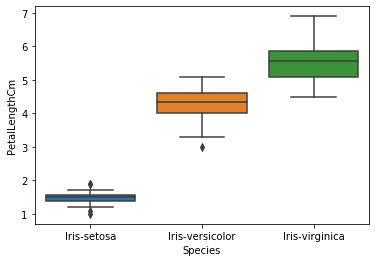

In [75]:
sns.boxplot(x = 'Species' , y = 'PetalLengthCm' , data = df)
plt.show()

Inference-<br>
very few outliers present in setosa and versicolor and none in virginica- no need to handle separately

### Pair wise correlation of variables 

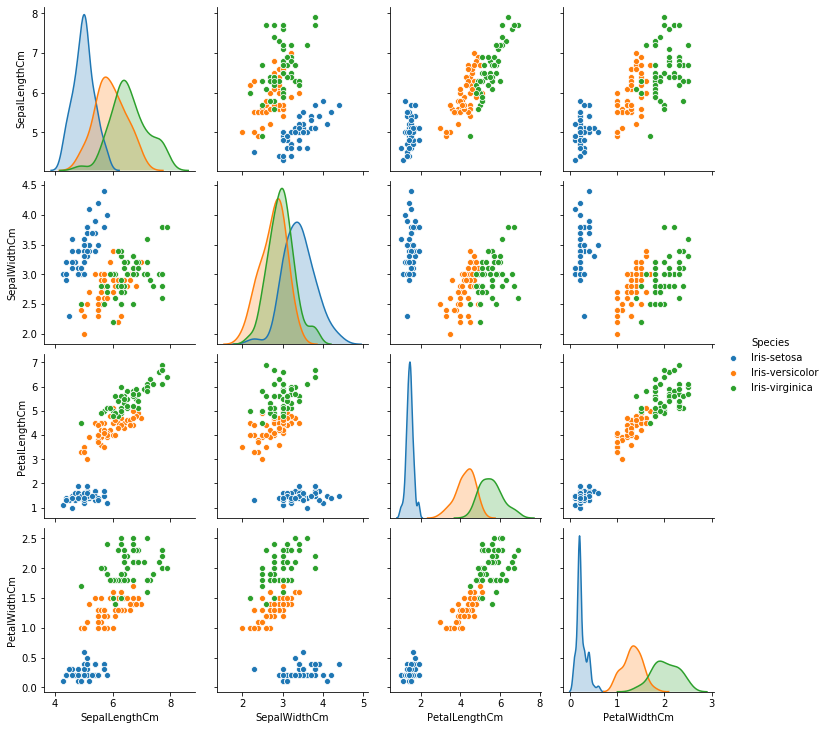

In [76]:
sns.pairplot(df , hue = 'Species')

Inference-<br>
Again same trend observed Sepallength and SepalWidth with similar distribution.

### Tune the Hyperparameters - What is the optimal value of k in k-means?

In [2]:
#The elbow method
from sklearn.cluster import KMeans
wcss = []
x = df.iloc[: ,[0, 1,2,3]].values
y = df.iloc[: , [4]].values

for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    model.fit(x)
    wcss.append(model.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

NameError: name 'df' is not defined

Inference-<br>
After k = 3 , there is not much decline in variation

### Fit and Train the K-Means Clustering Model

In [111]:
model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_pred = model.fit_predict(x)

## Check model performance
### Plot the predicted clusters by the model

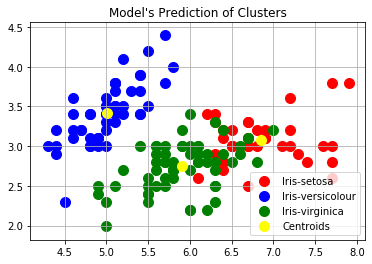

In [113]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title("Model's Prediction of Clusters")
plt.grid(True)
plt.legend()
#

Inference-<br>
An insight we can get from the scatterplot is the model’s accuracy in determining Versicolor is more compared to Setosa and Virginica.<br>
Could this be the result from previously seen overlapping distribution of variable or additional noise or outliers?<br>
A disadvantage of K-Means - It can not handle noisy data and outliers. It is not suitable to identify clusters with non-convex shapes.

### Plot 3-d curve 

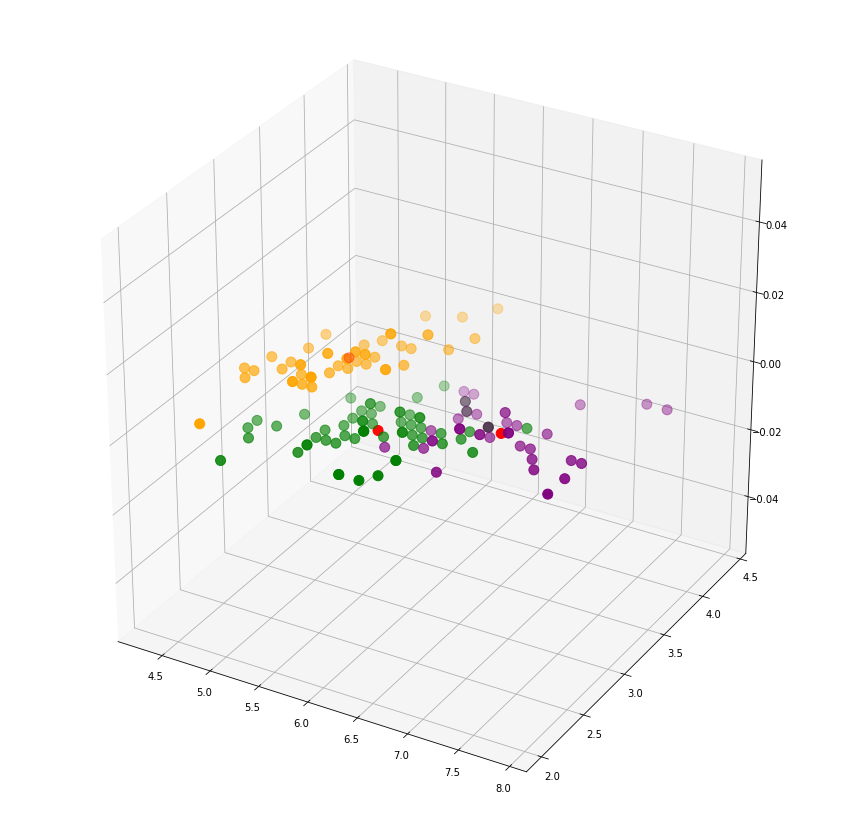

In [115]:
#3-d scatterplot denoting multiple features and convexity
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

Clusters do seem to be not having convex shape exactly